<a href="https://colab.research.google.com/github/DPasieka/pjd-ujk.github.io/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/Python/dataframes/Pokemon_7_generations.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Python/dataframes/Pokemon_8_generation.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Shield Dust', 'Run Away']",...,['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1.0,1.0,1.0,0.5,0.5,0.25,1.0,1.0,1.0,1.0,...,1.0,0.5,0.5,0.5,1.0,0.25,1.0,2.0,2.0,0.25
against_dark,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,2.0,0.5
against_dragon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.5,0.5,2.0,1.0,0.0
against_electric,0.5,0.5,0.5,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,0.5,2.0,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,...,1.0,0.5,2.0,2.0,1.0,0.5,0.5,4.0,1.0,0.5
against_fight,0.5,0.5,0.5,1.0,1.0,0.5,1.0,1.0,1.0,0.5,...,0.0,1.0,0.5,0.5,1.0,1.0,2.0,2.0,0.5,1.0
against_fire,2.0,2.0,2.0,0.5,0.5,0.5,0.5,0.5,0.5,2.0,...,1.0,0.5,2.0,2.0,1.0,2.0,4.0,0.5,1.0,2.0
against_flying,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.5,4.0,4.0,0.5,0.5,1.0,1.0,1.0,0.5
against_ghost,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0


In [7]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
No.,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
Name,Grookey,Thwackey,Rillaboom,Scorbunny,Raboot,Cinderace,Sobble,Drizzile,Inteleon,Blipbug,...,Goodra,Jangmoo,Hakamoo,Kommoo,Dreepy,Drakloak,Dragapult,Zacian,Zamazenta,Eternatus
Ability1,Overgrow,Overgrow,Overgrow,Blaze,Blaze,Blaze,Torrent,Torrent,Torrent,Swarm,...,Sap Sipper,Bulletproof,Bulletproof,Bulletproof,Clear Body,Clear Body,Clear Body,Intrepid Sword,Dauntless Shield,Pressure
Ability2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compoundeyes,...,Hydration,Soundproof,Soundproof,Soundproof,Infiltrator,Infiltrator,Infiltrator,NaN,NaN,NaN
Hidden_Ability,Grassy Surge,Grassy Surge,Grassy Surge,Libero,Libero,Libero,Sniper,Sniper,Sniper,Telepathy,...,Gooey,Overcoat,Overcoat,Overcoat,Cursed Body,Cursed Body,Cursed Body,NaN,NaN,NaN
Type1,grass,grass,grass,fire,fire,fire,water,water,water,bug,...,dragon,dragon,dragon,dragon,dragon,dragon,dragon,fairy,fighting,poison
Type2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,fighting,fighting,ghost,ghost,ghost,NaN,NaN,dragon
HP,50,70,100,50,65,80,50,65,70,25,...,90,45,55,75,28,68,88,92,92,140
Att,65,85,125,71,86,116,40,60,85,20,...,100,55,75,110,60,80,120,130,130,85
Def,50,70,90,40,60,75,40,55,65,20,...,70,65,90,125,30,50,75,115,115,95


In [8]:
#tworzę nową df z takimi kolmnami jak w df2, ale przepisuje tam dane z df1
df = {'Name': df1['name'], 'Ability1': df1['abilities'], 'Ability2': df1['abilities'], 'Type1': df1['type1'], 'Type2': df1['type2'], 'HP': df1['hp'], 'Att': df1['attack'], 'Def': df1['defense']
    , 'Spd': df1['speed'], 'S.Att': df1['sp_attack'], 'S.Def': df1['sp_defense'], 'Weight_kg': df1['weight_kg'], 'Height_m': df1['height_m']
    , 'Cap_Rate': df1['capture_rate'], 'Egg_Steps': df1['base_egg_steps'], 'Classification': df1['classfication']}

In [9]:
#rozdzielam dane z df1 abilities na dwie kolumny
df = pd.DataFrame(data=df)
df[['Ability1', 'Ability2']] = df1['abilities'].str.split(',', 1, expand=True)
df['Ability1'] = df['Ability1'].str[1:]
df['Ability2'] = df['Ability2'].str[:-1]
df.T

<ipython-input-9-3148216f70a1>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Ability1', 'Ability2']] = df1['abilities'].str.split(',', 1, expand=True)


,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
Name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon,Charizard,Squirtle,Wartortle,Blastoise,Caterpie,...,Lunala,Nihilego,Buzzwole,Pheromosa,Xurkitree,Celesteela,Kartana,Guzzlord,Necrozma,Magearna
Ability1,'Overgrow','Overgrow','Overgrow','Blaze','Blaze','Blaze','Torrent','Torrent','Torrent','Shield Dust',...,'Shadow Shield'],'Beast Boost'],'Beast Boost'],'Beast Boost'],'Beast Boost'],'Beast Boost'],'Beast Boost'],'Beast Boost'],'Prism Armor'],'Soul-Heart']
Ability2,'Chlorophyll','Chlorophyll','Chlorophyll','Solar Power','Solar Power','Solar Power','Rain Dish','Rain Dish','Rain Dish','Run Away',...,None,None,None,None,None,None,None,None,None,None
Type1,grass,grass,grass,fire,fire,fire,water,water,water,bug,...,psychic,rock,bug,bug,electric,steel,grass,dark,psychic,steel
Type2,poison,poison,poison,NaN,NaN,flying,NaN,NaN,NaN,NaN,...,ghost,poison,fighting,fighting,NaN,flying,steel,dragon,NaN,fairy
HP,45,60,80,39,58,78,44,59,79,45,...,137,109,107,71,83,97,59,223,97,80
Att,49,62,100,52,64,104,48,63,103,30,...,113,53,139,137,89,101,181,101,107,95
Def,49,63,123,43,58,78,65,80,120,35,...,89,47,139,37,71,103,131,53,101,115
Spd,45,60,80,65,80,100,43,58,78,45,...,97,103,79,151,83,61,109,43,79,65
S.Att,65,80,122,60,80,159,50,65,135,20,...,137,127,53,137,173,107,59,97,127,130


In [10]:
#dodanie pokemonów z gen 8 do df oraz usuwamie zbędnych kolumn
df_new = pd.concat([df, df2], ignore_index=True)
df_new = df_new.drop(columns=['No.', 'Hidden_Ability','Weight_lbs','Height_ft'])
#wypełnienie brakujących miejsc
df_new['Ability2'].fillna('missing',inplace=True)
df_new['Type2'].fillna('missing',inplace=True)
df_new['Weight_kg'].fillna('-1',inplace=True)
df_new['Height_m'].fillna('-1',inplace=True)
df_new

,Name,Ability1,Ability2,Type1,Type2,HP,Att,Def,Spd,S.Att,S.Def,Weight_kg,Height_m,Cap_Rate,Egg_Steps,Classification
0,Bulbasaur,'Overgrow','Chlorophyll',grass,poison,45,49,49,45,65,65,6.9,0.7,45,5120.0,Seed Pokémon
1,Ivysaur,'Overgrow','Chlorophyll',grass,poison,60,62,63,60,80,80,13.0,1.0,45,5120.0,Seed Pokémon
2,Venusaur,'Overgrow','Chlorophyll',grass,poison,80,100,123,80,122,120,100.0,2.0,45,5120.0,Seed Pokémon
3,Charmander,'Blaze','Solar Power',fire,missing,39,52,43,65,60,50,8.5,0.6,45,5120.0,Lizard Pokémon
4,Charmeleon,'Blaze','Solar Power',fire,missing,58,64,58,80,80,65,19.0,1.1,45,5120.0,Flame Pokémon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Drakloak,Clear Body,Infiltrator,dragon,ghost,68,80,50,102,60,50,11.0,1.4,45.0,10240.0,Caretaker Pokémon
1197,Dragapult,Clear Body,Infiltrator,dragon,ghost,88,120,75,142,100,75,50.0,3.0,45.0,10240.0,Stealth Pokémon
1198,Zacian,Intrepid Sword,missing,fairy,missing,92,130,115,138,80,115,110.0,2.8,10.0,30720.0,Warrior Pokémon
1199,Zamazenta,Dauntless Shield,missing,fighting,missing,92,130,115,138,80,115,210.0,2.9,10.0,30720.0,Warrior Pokémon


In [11]:
df_new.isna().sum()

Name              0
Ability1          0
Ability2          0
Type1             0
Type2             0
HP                0
Att               0
Def               0
Spd               0
S.Att             0
S.Def             0
Weight_kg         0
Height_m          0
Cap_Rate          0
Egg_Steps         0
Classification    0
dtype: int64

In [12]:
df_new.dtypes

Name               object
Ability1           object
Ability2           object
Type1              object
Type2              object
HP                  int64
Att                 int64
Def                 int64
Spd                 int64
S.Att               int64
S.Def               int64
Weight_kg          object
Height_m           object
Cap_Rate           object
Egg_Steps         float64
Classification     object
dtype: object

In [13]:
#Cap_Rate z jakiegoś powodu jest object type
df_new.Cap_Rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)', 45.0, 255.0, 120.0,
       90.0, 127.0, 75.0, 60.0, 235.0, 150.0, 190.0, 225.0, 50.0, 140.0,
       70.0, 205.0, 155.0, 220.0, 65.0, 130.0, 30.0, 125.0, 180.0, 25.0,
       200.0, 100.0, 80.0, 55.0, 145.0, 35.0, 3.0, 10.0], dtype=object)

In [14]:
#zmiana wartości string na int
df_new['Cap_Rate'] = df_new['Cap_Rate'].replace({'30 (Meteorite)255 (Core)':113})
df_new.Cap_Rate.astype(int)

0        45
1        45
2        45
3        45
4        45
       ... 
1196     45
1197     45
1198     10
1199     10
1200    255
Name: Cap_Rate, Length: 1201, dtype: int64

<Axes: xlabel='Att', ylabel='Def'>

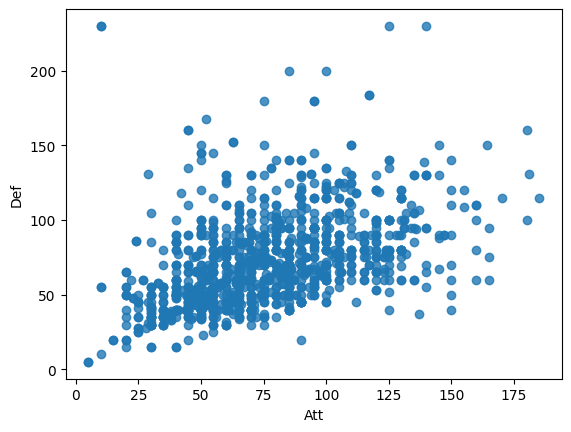

In [15]:
sns.regplot(x=df_new["Att"], y=df_new["Def"],fit_reg=0)

<Axes: xlabel='Def', ylabel='HP'>

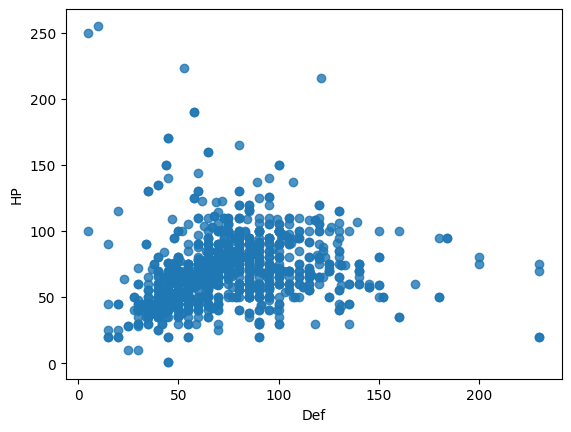

In [16]:
sns.regplot(x=df_new["Def"], y=df_new["HP"],fit_reg=0)

<Axes: xlabel='Spd', ylabel='Type1'>

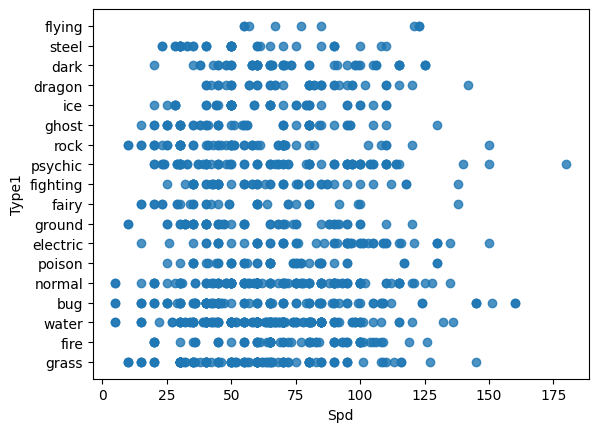

In [17]:
sns.regplot(x=df_new["Spd"], y=df_new["Type1"],fit_reg=0)

In [62]:
#Ciężko zauważyć jakąkolwiek zależność, jednak spróbuję przewidywać Type1
#dzielenie na 2 zbiory
X = df_new[['Ability1','Ability2', 'Type2', 'HP', 'Att','Def','Spd', 'S.Att', 'S.Def', 'Height_m', 'Cap_Rate', 'Egg_Steps']]
y = df_new[['Type1']]
#kodowanie tekstu na liczbe
le = LabelEncoder()
X["Ability1"] = le.fit_transform(X['Ability1'])
X["Ability2"] = le.fit_transform(X['Ability2'])
X["Type2"] = le.fit_transform(X['Type2'])
y["Type1"] = le.fit_transform(y["Type1"])
X

<ipython-input-62-9753eaebdae5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Ability1"] = le.fit_transform(X['Ability1'])
<ipython-input-62-9753eaebdae5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Ability2"] = le.fit_transform(X['Ability2'])
<ipython-input-62-9753eaebdae5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Ability1,Ability2,Type2,HP,Att,Def,Spd,S.Att,S.Def,Height_m,Cap_Rate,Egg_Steps
0,98,14,14,45,49,49,45,65,65,0.7,45,5120.0
1,98,14,14,60,62,63,60,80,80,1.0,45,5120.0
2,98,14,14,80,100,123,80,122,120,2.0,45,5120.0
3,12,269,12,39,52,43,65,60,50,0.6,45,5120.0
4,12,269,12,58,64,58,80,80,65,1.1,45,5120.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,194,381,8,68,80,50,102,60,50,1.4,45.0,10240.0
1197,194,381,8,88,120,75,142,100,75,3.0,45.0,10240.0
1198,230,447,12,92,130,115,138,80,115,2.8,10.0,30720.0
1199,202,447,12,92,130,115,138,80,115,2.9,10.0,30720.0


In [63]:
#standaryzacja
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.31818182, 0.03131991, 0.77777778, ..., 0.08095238, 0.16666667,
        0.13043478],
       [0.31818182, 0.03131991, 0.77777778, ..., 0.0952381 , 0.16666667,
        0.13043478],
       [0.31818182, 0.03131991, 0.77777778, ..., 0.14285714, 0.16666667,
        0.13043478],
       ...,
       [0.74675325, 1.        , 0.66666667, ..., 0.18095238, 0.02777778,
        1.        ],
       [0.65584416, 1.        , 0.66666667, ..., 0.18571429, 0.02777778,
        1.        ],
       [0.82467532, 1.        , 0.11111111, ..., 1.        , 1.        ,
        1.        ]])

In [64]:
#dzielenie danych za zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [65]:
X_train

array([[0.52597403, 0.17897092, 0.22222222, ..., 0.05714286, 0.58333333,
        0.04347826],
       [0.88961039, 1.        , 0.66666667, ..., 0.06190476, 1.        ,
        0.08695652],
       [0.14935065, 0.27740492, 0.27777778, ..., 0.14761905, 0.26587302,
        0.08695652],
       ...,
       [0.06818182, 0.48322148, 0.55555556, ..., 0.07142857, 1.        ,
        0.08695652],
       [0.76298701, 1.        , 0.83333333, ..., 0.07142857, 1.        ,
        0.13043478],
       [0.64935065, 0.87024609, 0.66666667, ..., 0.07619048, 0.58333333,
        0.04347826]])

In [66]:
#test sieci na domyślnych parametrach
clf = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average="weighted", zero_division=1.0)

0.15699343113909478

In [68]:
print(pd.DataFrame(data=confusion_matrix(y_test, y_pred)))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0    8   0   1   1   0   0   2   0   0   0   0   0   7   0   1   1   0   4
1    2   0   0   0   0   0   1   0   0   0   0   0   9   0   1   0   0  10
2    0   0   1   0   0   0   1   0   0   0   0   0   5   0   1   0   0   5
3    2   0   0   1   0   0   1   0   0   1   0   0   7   0   2   0   0   4
4    1   0   1   0   0   0   1   0   0   4   0   0   1   0   0   0   0   7
5    0   0   0   0   0   2   0   0   0   0   0   0  11   0   0   0   0   4
6    0   0   1   0   0   0   7   0   0   1   0   0   7   0   0   0   0   5
7    1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   2
8    0   0   0   1   0   0   1   0   0   0   0   0   4   0   0   3   0   5
9    3   0   0   0   0   0   2   0   0   2   0   0   9   0   2   1   0  20
10   3   0   2   0   0   1   0   0   0   0   0   0   6   0   0   1   0   4
11   2   0   0   0   0   0   1   0   0   1   0   0   2   0   1   0   0   9
12   0   0   3   0   0   

In [42]:
#słownik hiperparametrów
params = dict()
params['random_state'] = [0.5,1,2,4]
params['activation'] = ['tanh','relu']
params['solver'] = ['adam']
params['alpha'] = [1,0.01,0.0001,0.000001]
params['learning_rate'] = ['adaptive']
params['learning_rate_init'] = [1,0,0.1,0.01,0.001]
params['shuffle'] = [True]
params['hidden_layer_sizes'] = [(32,32,32),(64,64,64),(128,128,128),(256,256,256)]
params['max_iter'] = [128, 256, 512, 1024]
params

{'random_state': [0.5, 1, 2, 4],
 'activation': ['tanh', 'relu'],
 'solver': ['adam'],
 'alpha': [1, 0.01, 0.0001, 1e-06],
 'learning_rate': ['adaptive'],
 'learning_rate_init': [1, 0, 0.1, 0.01, 0.001],
 'shuffle': [True],
 'hidden_layer_sizes': [(32, 32, 32),
  (64, 64, 64),
  (128, 128, 128),
  (256, 256, 256)],
 'max_iter': [128, 256, 512, 1024]}

In [44]:
#automatyczna optymalizacja hiperparametrów
search = RandomizedSearchCV(clf, params, scoring='f1_weighted', verbose=3)
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=2, shuffle=True, solver=adam;, score=0.311 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=2, shuffle=True, solver=adam;, score=0.232 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=2, shuffle=True, solver=adam;, score=0.327 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=2, shuffle=True, solver=adam;, score=0.257 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(32, 32, 32), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=2, shuffle=True, solver=adam;, score=0.225 total time=   1.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.095 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.085 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.062 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.105 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.038 total time=   7.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=1, max_iter=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=0.001, max_iter=256, random_state=1, shuffle=True, solver=adam;, score=0.327 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=0.001, max_iter=256, random_state=1, shuffle=True, solver=adam;, score=0.263 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=0.001, max_iter=256, random_state=1, shuffle=True, solver=adam;, score=0.304 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=0.001, max_iter=256, random_state=1, shuffle=True, solver=adam;, score=0.340 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 128, 128), learning_rate=adaptive, learning_rate_init=0.001, max_iter=256, random_state=1, shuffle=True, solver=adam;, score=0.231 total time=   4.0s
[CV 1/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=4, shuffle=True, solver=adam;, score=0.281 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=4, shuffle=True, solver=adam;, score=0.274 total time=  10.7s
[CV 3/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=4, shuffle=True, solver=adam;, score=0.356 total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=4, shuffle=True, solver=adam;, score=0.328 total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(256, 256, 256), learning_rate=adaptive, learning_rate_init=0.01, max_iter=128, random_state=4, shuffle=True, solver=adam;, score=0.332 total time=   9.4s
[CV 1/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 2/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 3/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024, random_state=0.5, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 4/5] END activation=relu, alpha=1e-06, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.01, max_iter=1024

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.016 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.018 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.016 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0.1, max_iter=512, random_state=2, shuffle=True, solver=adam;, score=0.033 total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0, max_iter=1024, random_state=4, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0, max_iter=1024, random_state=4, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0, max_iter=1024, random_state=4, shuffle=True, solver=adam;, score=nan total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=0, max_iter=1024, random_state=4, s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=1, shuffle=True, solver=adam;, score=0.033 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=1, shuffle=True, solver=adam;, score=0.036 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=1, shuffle=True, solver=adam;, score=0.033 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=1, shuffle=True, solver=adam;, score=0.033 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64, 64), learning_rate=adaptive, learning_rate_init=1, max_iter=1024, random_state=1, shuffle=True, solver=adam;, score=0.033 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-p

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [1, 0.01, 0.0001, 1e-06],
                                        'hidden_layer_sizes': [(32, 32, 32),
                                                               (64, 64, 64),
                                                               (128, 128, 128),
                                                               (256, 256, 256)],
                                        'learning_rate': ['adaptive'],
                                        'learning_rate_init': [1, 0, 0.1, 0.01,
                                                               0.001],
                                        'max_iter': [128, 256, 512, 1024],
                                        'random_state': [0.5, 1, 2, 4],
                                        'shuffle': [True], 'solver': ['adam']},
                   scoring='f1_weighted', verbose=3)

In [48]:
#wylosowane najlepsze parametry
search.best_params_

{'solver': 'adam',
 'shuffle': True,
 'random_state': 4,
 'max_iter': 128,
 'learning_rate_init': 0.01,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (256, 256, 256),
 'alpha': 1e-06,
 'activation': 'relu'}

In [49]:
#przypisanie i ponowne uruchomienie sieci na najlepszych parametrach
search.best_estimator_

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(256, 256, 256),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=128,
              random_state=4)

In [69]:
clf_search = search.best_estimator_
clf_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(256, 256, 256),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=128,
              random_state=4)

In [70]:
y_pred = clf_search.predict(X_test)
f1_score(y_test, y_pred, average="weighted", zero_division=1.0)

0.20030050741070893